# Лабораторна робота №2

### Використання Pandas для аналізу даних

**Виконав\
студент групи КН-221а\
Медвідь Роман Ігорович\
Перевірив\
асистент кафедри\
Звєрцев Герман Олександрович**

### Мета: Вивчення основних функцій Pandas для аналізу даних.


In [4]:
N = (15 + 4) % 5 + 1
print(N)

5


Виконайте вправи по варіантах. Для розрахунку номеру варіанту
скористуватися формулою. 
N = (n + 4 ) % 5 + 1 , де N – номер варіанту, n – номер у списку групи.

5 варіант - (2, 4, 6, 7, 9, 10, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file = 'NationalNames.csv';
data = pd.read_csv(file);

In [30]:
# 2. Вивести останні 8 рядків набору даних.
print(data.tail(8));

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [31]:
# 4. Отримайте загальну інформацію про дані у наборі даних.
print(data.describe());

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


In [32]:
# 6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних
gender_counts = data.groupby('Gender')['Name'].nunique().reset_index();
gender_counts.columns = ['Gender', 'Count'];
print(gender_counts.tail(2));

  Gender  Count
0      F  64911
1      M  39199


In [29]:
# 7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році
data_2010 = data[data['Year'] == 2010];
male_names = data_2010[data_2010['Gender'] == 'M'];
print(male_names.head(5));

              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030


In [23]:
# 9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
min_count = data['Count'].min();
min_count_records = (data['Count'] == min_count).sum();
print(min_count_records);

254615


In [26]:
# 10. Підрахуйте кількість унікальних імен у кожному році
uniqe_names_per_year = data.groupby('Year')['Name'].nunique().reset_index(name='Unique Names');
print(uniqe_names_per_year);

     Year  Unique Names
0    1880          1889
1    1881          1830
2    1882          2012
3    1883          1962
4    1884          2158
..    ...           ...
130  2010         31603
131  2011         31418
132  2012         31236
133  2013         30774
134  2014         30579

[135 rows x 2 columns]


In [28]:
# 15. Знайдіть загальну кількість народжень за рік.
total_births_per_year = data.groupby('Year')['Count'].sum().reset_index(name='Total Births');
print(total_births_per_year.head());

   Year  Total Births
0  1880        201484
1  1881        192699
2  1882        221538
3  1883        216950
4  1884        243467


In [33]:
# 16. Знайдіть рік, коли народилося найбільше дітей.
total_children_per_year = data.groupby('Year')['Count'].sum();
print(total_children_per_year.idxmax());

1957


In [39]:
# 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року.
children_per_year_gender = data.groupby(['Year', 'Gender'])['Count'].sum().unstack();
print(children_per_year_gender);

Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


In [40]:
# 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.
years_more_girls = (children_per_year_gender['F'] > children_per_year_gender['M']).sum()
print(years_more_girls);

54


In [42]:
# 20. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)
data_m = data[data['Gender'] == 'M'];
data_f = data[data['Gender'] == 'F'];
unique_names_m = set(data_m['Name'].unique());
unique_names_f = set(data_f['Name'].unique());
neutral_names_for_20 = unique_names_m.intersection(unique_names_f);
num_neutral_all_names = len(neutral_names_for_20);
print(num_neutral_all_names);

10221


In [43]:
# 21. Порахуйте, скільки разів хлопчиків називали Barbara.
barbara_male_count = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum();
print(barbara_male_count);

4139


In [44]:
# 22. Підрахуйте скільки років проводилось спостереження.
print(data['Year'].nunique());

135


In [53]:
# 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року).
neutral_names = data[data.duplicated(['Name', 'Year'], keep=False)];
name_year_counts = neutral_names.groupby('Name')['Year'].nunique().reset_index();
all_years = data['Year'].nunique();
filtered_names = name_year_counts[name_year_counts['Year'] == all_years];
filtered_names_result = data[data['Name'].isin(filtered_names['Name'])];
neutral_name_counts = filtered_names_result.groupby('Name')['Count'].sum().reset_index();
sorted__neutral_names = neutral_name_counts.sort_values(by='Count', ascending=False);
top_neutral_names = sorted__neutral_names.head(16);

for i, name in enumerate(top_neutral_names['Name']):
    print(f"{i} {name}");

0 James
1 John
2 Robert
3 William
4 Joseph
5 Jean
6 Jesse
7 Leslie
8 Francis
9 Lee
10 Jessie
11 Marion
12 Johnnie
13 Sidney
14 Ollie
15 Tommie


In [50]:
# 24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів).
unpopular_names = data[data['Count'] < 100];
most_popular_unpopular_name = unpopular_names.sort_values(by = 'Count', ascending = False).head(1);
print("Найпопулярніше серед непопулярних імен:");
print(most_popular_unpopular_name['Name'].values[0]);

Найпопулярніше серед непопулярних імен:
Johnson


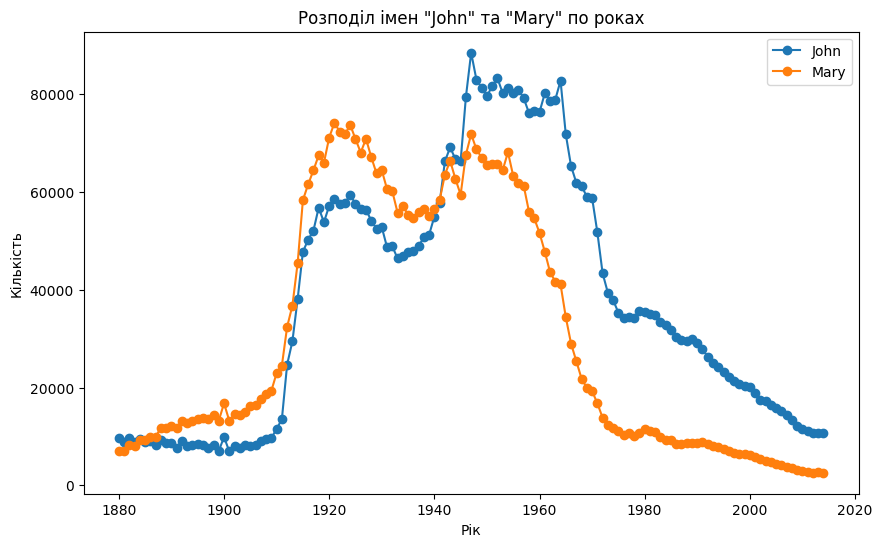

In [45]:
# 25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.
john_data = data[(data['Name'] == 'John')]
mary_data = data[(data['Name'] == 'Mary')]

john_grouped = john_data.groupby('Year')['Count'].sum()
mary_grouped = mary_data.groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))

plt.plot(john_grouped.index, john_grouped.values, marker='o', linestyle='-', label='John')
plt.plot(mary_grouped.index, mary_grouped.values, marker='o', linestyle='-', label='Mary')

plt.title('Розподіл імен "John" та "Mary" по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()

plt.show()

In [ ]:
# 27. Знайти найпопулярніші імена в кожному році.
popular_names_by_year = data.groupby("Year").apply(lambda x: x.loc[x["Count"].idxmax()]);
print(popular_names_by_year[["Name", "Count"]]);

          Name  Count
Year                 
1880      John   9655
1881      John   8769
1882      John   9557
1883      John   8894
1884      John   9388
...        ...    ...
2010  Isabella  22883
2011    Sophia  21816
2012    Sophia  22267
2013    Sophia  21147
2014      Emma  20799

[135 rows x 2 columns]
